# The idea
We are trying to find the optimum values of weights in a dataset with arbitrary number of features. The formula for multiple linear regression is as follows: <br>

1. y<sub>pred</sub> = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + ... w<sub>n</sub>x<sub>n</sub> + w<sub>0</sub>x<sub>0</sub> or y<sub>pred</sub> = W.x where x<sub>0</sub> = 1
1. Error formula: e = (y<sub>pred</sub> - y<sub>actual</sub>)<sup>2</sup> = (W.x - y<sub>actual</sub>)<sup>2</sup> = (w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + ... w<sub>n</sub>x<sub>n</sub> + w<sub>0</sub>x<sub>0</sub> - y<sub>actual</sub>)<sup>2</sup>
1. Derivative vector de/dW = {de/dw<sub>1</sub>, de/dw<sub>2</sub>, de/dw<sub>3</sub>, ... de/dw<sub>n</sub>, de/dw<sub>0</sub>} <br>
 = δe/δy<sub>pred</sub>.{δy<sub>pred</sub>/δw<sub>1</sub>, δy<sub>pred</sub>/δw<sub>2</sub> ..., δy<sub>pred</sub>/δw<sub>n</sub>, δy<sub>pred</sub>/δw<sub>0</sub>} <br>
 = 2*(y<sub>pred</sub> - y<sub>actual</sub>){δy<sub>pred</sub>/δw<sub>1</sub>, δy<sub>pred</sub>/δw<sub>2</sub> ..., δy<sub>pred</sub>/δw<sub>n</sub>, δy<sub>pred</sub>/δw<sub>0</sub>} <br>
 = 2*(y<sub>pred</sub> - y<sub>actual</sub>){x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>,... x<sub>n</sub>, x<sub>0</sub>} 
1. Change the weights: W<sub>new</sub> = W<sub>old</sub> - ηde/dW

In [1]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt
from statistics import mean

# Define the linear regression function
Here we define the linear regression function as below:<br>

y<sub>pred</sub> = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + ... w<sub>n</sub>x<sub>n</sub> + w<sub>0</sub>x<sub>0</sub> where x<sub>0</sub> = 1

In [2]:
def linear_regression(
    W: np.array,
    x: List[float]
    ) -> float:
    # first we do a checking whether both the shapes of W and x are same
    assert len(W) == len(x), "Length of weight and predictor vectors should be equal"
    y_pred = np.dot(W, x)
    return y_pred

In [3]:
W=[2.0,3.0];x=[4,5]
linear_regression(W,x)

23.0

In [4]:
def error_calculation(y_pred: float, 
                      y_actual: float) -> float:
    error = (y_pred - y_actual)**2
    return error

In [5]:
error_calculation(2,5)

9

# Here we will calculate the derivative of the function using below formula
Derivative vector de/dW = {de/dw<sub>1</sub>, de/dw<sub>2</sub>, de/dw<sub>3</sub>, ... de/dw<sub>n</sub>} <br>
 = δe/δy<sub>pred</sub>.{δy<sub>pred</sub>/δw<sub>1</sub>, δy<sub>pred</sub>/δw<sub>2</sub> ..., δy<sub>pred</sub>/δw<sub>n</sub>} <br>
 = 2*(y<sub>pred</sub> - y<sub>actual</sub>){δy<sub>pred</sub>/δw<sub>1</sub>, δy<sub>pred</sub>/δw<sub>2</sub> ..., δy<sub>pred</sub>/δw<sub>n</sub>} <br>
 = 2*(y<sub>pred</sub> - y<sub>actual</sub>){x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>,... x<sub>n</sub>} 

In [6]:
def calculate_derivative(
                         x: List[float],
                         y_actual: float,
                         y_pred: float
                        ) -> np.array:
    de_dW = 2*(y_pred-y_actual)*np.array(x)
    return de_dW

In [7]:
calculate_derivative(x=x,y_pred=23.0,y_actual=23.25)

array([-2. , -2.5])

# Update the weights and biases
Change the weights: W<sub>new</sub> = W<sub>old</sub> - ηde/dW

In [8]:
def update_weights(
    W: List[float],
    de_dW: np.array,
    learning_rate: float=0.001
) -> np.array:
    W_new = W - learning_rate*de_dW
    return W_new

In [9]:
update_weights(W,np.array([-2. , -2.5]),0.001)

array([2.002 , 3.0025])

# Stitch all the methods together

In [10]:
def train(
    dataset:np.array,
    learning_rate = 0.001,
    bias: float = None,
    epochs = 1,
    W = None,
    plot_graphs = False
         ):
    # initialize W:
    if W == None:
        W: np.array=np.zeros(dataset[:,:-1].shape[1])
    error_list = []
    # append the bias
    if bias != None:
        W = np.append(W, bias)
    for epoch in range(0,epochs):
        error_list_per_epoch = []
        for row in dataset:
            # get the features
            x: List[float] = row[:-1]
            y_actual: float = row[-1]
            # append the bias terms
            if bias != None:
                x = np.append(x,1.0)
            # perform the linear regression
            y_pred = linear_regression(W=W, x=x)
            # calculate error
            error = error_calculation(y_pred, y_actual)
            error_list_per_epoch.append(error)
            # calculate derivative
            de_dW = calculate_derivative(x=x, y_pred=y_pred, y_actual=y_actual)
            # update the weights
            W = update_weights(W, de_dW, learning_rate)
        
        # plot the graph at end of each epoch
        # first check whether the given dataset is a single feature dataset or not
        if dataset[:,:-1].shape[1] == 1 and plot_graphs:
            if bias == None:
                plt.scatter(dataset[:,0], dataset[:,1])
                y_pred = W[0]*dataset[:,0]
                plt.plot(dataset[:,0], y_pred)
            else:
                plt.scatter(dataset[:,0], dataset[:,1])
                y_pred = W[0]*dataset[:,0] + W[1]
                plt.plot(dataset[:,0], y_pred)
        error_list.append(mean(error_list_per_epoch))
    return (error_list, W)

# Create a sample dataset

In [11]:
import pandas as pd
data = {'x1':np.random.randn(50),
#         'x2': np.random.randn(50),
#         'x3': np.random.randn(50)
       }
df = pd.DataFrame(data)
df['y'] = 25 + 2*df.x1
# 3*df.x2 + 5*df.x3 + \

# Get the average errors per epoch and the corresponding weights

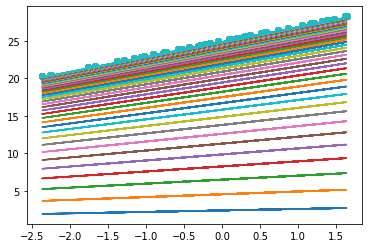

In [12]:
dataset = df.values
error_list, W = train(dataset=dataset, 
                      bias=0, 
                      epochs=50, 
                      learning_rate=0.001,
                      W = [0],
                      plot_graphs= True
                     )

In [13]:
W

array([ 1.98804021, 24.83279678])

# View how error is decreasing with epochs

Text(0, 0.5, 'Error')

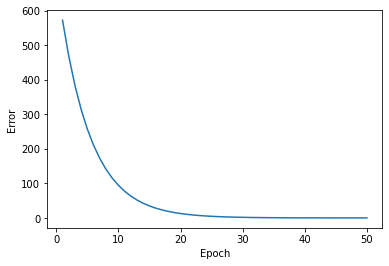

In [14]:
plt.plot([i+1 for i in range(0,len(error_list))], error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')

# View the effect of learning rate on error decrease

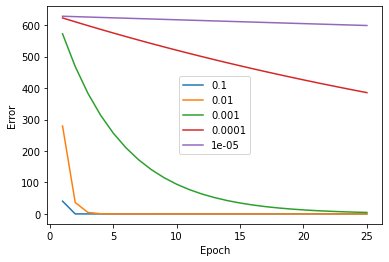

In [15]:
learning_rates = [0.1,0.01,0.001,0.0001,0.00001]
for learning_rate in learning_rates:
    error_list, W = train(dataset=dataset, 
                      bias=0, 
                      epochs=25, 
                      learning_rate=learning_rate,
                      W = None
                     )
    plt.plot([i+1 for i in range(0,len(error_list))], error_list)
    plt.legend(learning_rates)
    plt.xlabel('Epoch')
    plt.ylabel('Error')